In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Use the helper code below to generate the data

# Defines the number of data points to generate
num_points = 30 

# Generate predictor points (x) between 0 and 5
x = np.linspace(0,5,num_points)

# Generate the response variable (y) using the predictor points
y = x * np.sin(x) + np.random.normal(loc=0, scale=1, size=num_points)

# Generate data of the true function y = x*sin(x) 
# x_b will be used for all predictions below 
x_b = np.linspace(0,5,100)
y_b = x_b*np.sin(x_b)


In [3]:
# Split the data into train and test sets with .33 and random_state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

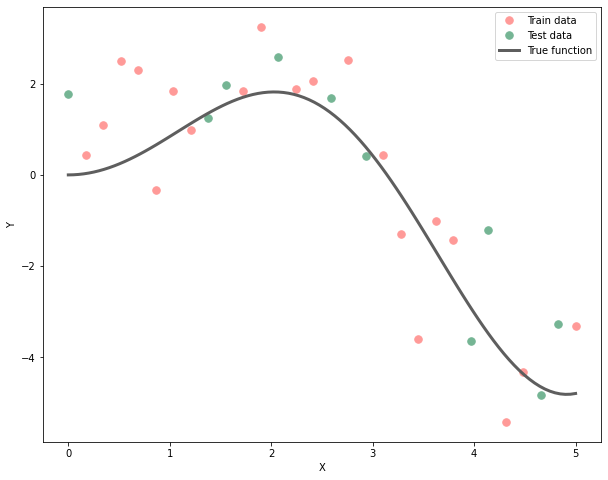

In [4]:
# Helper code to plot the generated data 

# Plot the train data
plt.rcParams["figure.figsize"] = (10,8)

plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')

# Plot the test data
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')

# Plot the true data
plt.plot(x_b, y_b, '-', label='True function', linewidth=3, color='#5E5E5E')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Begin with an unregularized NN. 

#### Same as the previous exercise

In [5]:
# Building an unregularized NN. 
# Initialise the NN, give it an appropriate name for the ease of reading
# The FCNN has 5 layers, each with 100 nodes
model_1 = models.Sequential(name='Unregularized')

# Add 5 hidden layers with 100 neurons each
model_1.add(layers.Dense(100,  activation='tanh', input_shape=(1,)))
model_1.add(layers.Dense(100,  activation='relu'))
model_1.add(layers.Dense(100,  activation='relu'))
model_1.add(layers.Dense(100,  activation='relu'))
model_1.add(layers.Dense(100,  activation='relu'))

# Add the output layer with one neuron 
model_1.add(layers.Dense(1,  activation='linear'))

# View the model summary
model_1.summary()

Model: "Unregularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 40,701
Trainable params: 40,701
Non-trainable params: 0
_________________________________________________

In [7]:
# Load with the weights already provided for the unregularized network

model_1.load_weights('weights.h5')

# Compile the model
model_1.compile(loss='MSE',optimizer=optimizers.Adam(learning_rate=0.001)) 

In [8]:
# Use the model above to predict for x_b (used exclusively for plotting) 
y_pred = model_1.predict(x_b)

# Use the model above to predict on the test data
y_pred_test = model_1.predict(x_test)

# Compute the MSE on the test data
mse = mean_squared_error(y_test,y_pred_test)

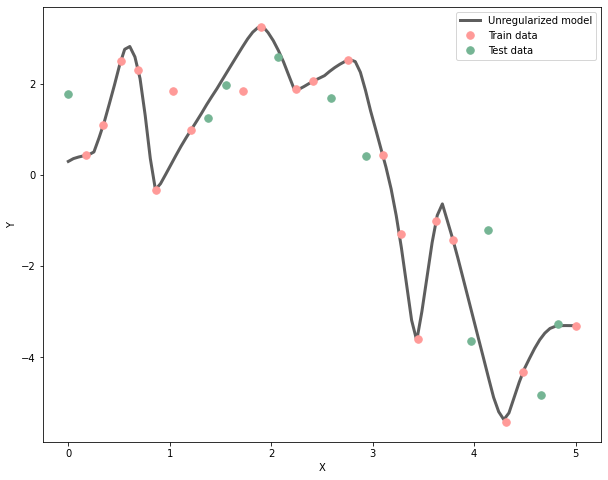

In [11]:
# Use the helper code to plot the predicted data
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(x_b, y_pred, label = 'Unregularized model', color='#5E5E5E', linewidth=3)
plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Implement previous NN with early stopping 
For early stopping we build the same network but then we implement early stopping using callbacks. 

In [0]:
# Building an unregularized NN with early stopping. 
# Initialise the NN, give it an appropriate name for the ease of reading
# The FCNN has 5 layers, each with 100 nodes
model_2 = models.Sequential(name='EarlyStopping')

# Add 5 hidden layers with 100 neurons each 
# tanh is the activation for the first layer
# relu is the activation for all other layers
model_2.add(layers.Dense(100,  activation='tanh', input_shape=(1,)))
model_2.add(layers.Dense(100,  activation='relu'))
model_2.add(layers.Dense(100,  activation='relu'))
model_2.add(layers.Dense(100,  activation='relu'))
model_2.add(layers.Dense(100,  activation='relu'))

# Add the output layer with one neuron 
model_2.add(layers.Dense(1,  activation='linear'))

# View the model summary
model_2.summary()

In [0]:
# Use the keras early stopping callback with patience=10 while monitoring the loss
callback = ___

# Compile the model with MSE as loss and Adam optimizer with learning rate as 0.001
___

# Save the history about the model after fitting on the train data
# Use 0.2 validation split with 1500 epochs and batch size of 10
# Use the callback for early stopping here
history_2 = ___


In [0]:
# Helper function to plot the data
# Plot the MSE of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Early stop model")
plt.semilogy(history_2.history['loss'], label='Train Loss', color='#FF9A98', linewidth=2)
plt.semilogy(history_2.history['val_loss'],  label='Validation Loss', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Log MSE Loss')
plt.legend()
plt.show()

In [0]:
# Use the early stop implemented model above to predict for x_b (used exclusively for plotting)
y_early_stop_pred = ___

# Use the model above to predict on the test data
y_earl_stop_pred_test = ___

# Compute the test MSE by predicting on the test data
mse_es = ___

In [0]:
# Use the helper code to plot the predicted data

# Plotting the predicted data using the L2 regularized model
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(x_b, y_early_stop_pred, label='Early stop regularized model', color='black', linewidth=2)

# Plotting the predicted data using the unregularized model
plt.plot(x_b, y_pred, label = 'Unregularized model', color='#005493', linewidth=2)

# Plotting the training data
plt.plot(x_train,y_train, '.', label='Train data', markersize=15, color='#FF9A98')

# Plotting the testing data
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Mindchow 🍲

**After marking change the patience parameter once to 2 and once to 100 in the early stopping callback with the same data. Do you notice any change? While value is more efficient?**